# **Predictive Analytics**

For this task, you’ll likely need to use statistical software such as R, SAS, or Python.

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [270]:
# This project is for Data@ANZ, written by UNO FANG on 10 Jun 2022

# Import packages
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

# get the dirs of all files under the sample_data folder
for dirname, _, filenames in os.walk('sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sample_data/README.md
sample_data/anscombe.json
sample_data/anz_synthesised_trans_data.csv
sample_data/ANZ synthesised transaction dataset.xlsx
sample_data/california_housing_test.csv
sample_data/mnist_test.csv
sample_data/mnist_train_small.csv
sample_data/california_housing_train.csv


In [3]:
anz_data_csv_dir = 'sample_data/anz_synthesised_trans_data.csv'
if not os.path.isfile(anz_data_csv_dir):
  # If not exsit the csv file, convert the xlsx file to csv format
  read_file = pd.read_excel (r'sample_data/ANZ synthesised transaction dataset.xlsx')
  read_file.to_csv (anz_data_csv_dir, index = None, header=True)

# read out the csv file as data
data = pd.read_csv(anz_data_csv_dir)
data.shape

(12043, 23)

The metadata of this dataset (i.e., ANZ synthesised transaction dataset) has been demonstrated in the Task 01 Exploratory Data Analysis. Therefore, we will not show the meta in this task. 

# **Data Cleaning**

*   Remove irrelevant attributes
*   Check duplicates
*   Cast correct types of values
*   Build new columns for insight analysis




In [4]:
# drop irrelevant attributes (which have lots of null values)
if hasattr(data, 'bpay_biller_code'):
    data.drop(columns = ['bpay_biller_code', 'long_lat', 'country', 'merchant_long_lat', 'merchant_code'], axis = 1, inplace=True)
# cast extraction as datetime
data['extraction']= pd.to_datetime(data['extraction'])
# establish new attributes indicating specific day and month
data['day'] = data['extraction'].dt.day_name()
data['month'] =data['extraction'].dt.month_name()

data.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,movement,day,month
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,debit,Wednesday,August
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,debit,Wednesday,August
2,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,debit,Wednesday,August
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,debit,Wednesday,August
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,debit,Wednesday,August


# **Data Analytics on Annual Salary**



*   Demonstrate customers' annual salaries to their age, gender, balance, monthly expense and monthly income using scatter plots 
*   Develop a regression model to predict the annual salary for each customer
*   Build a decision-tree based model to predict annual salary



In [210]:
annual_salary = data[data['txn_description'] == ('PAY/SALARY')].groupby(['customer_id','age','gender'])['amount'].sum()*4
annual_salary = annual_salary.reset_index(name='salary')
annual_salary

,customer_id,age,gender,salary
0,CUS-1005756958,53,F,50464.44
1,CUS-1117979751,21,M,100202.20
2,CUS-1140341822,28,M,45996.24
3,CUS-1147642491,34,F,88992.28
4,CUS-1196156254,34,F,109304.44
...,...,...,...,...
95,CUS-72755508,35,F,34815.36
96,CUS-809013380,21,F,53927.64
97,CUS-860700529,30,M,43406.88
98,CUS-880898248,26,M,34415.52


In [275]:
data.groupby('customer_id')['amount'].max()

customer_id
CUS-1005756958     970.47
CUS-1117979751    3578.65
CUS-1140341822    1916.51
CUS-1147642491    1711.39
CUS-1196156254    3903.73
                   ...   
CUS-72755508      1180.00
CUS-809013380     1383.00
CUS-860700529     1808.62
CUS-880898248     1433.98
CUS-883482547     3977.46
Name: amount, Length: 100, dtype: float64

In [277]:
data.groupby('customer_id')['amount'].mean()

customer_id
CUS-1005756958    222.862603
CUS-1117979751    339.843700
CUS-1140341822    212.632500
CUS-1147642491    245.600169
CUS-1196156254    147.145796
                     ...    
CUS-72755508      197.213276
CUS-809013380     151.694274
CUS-860700529      77.681888
CUS-880898248     146.954487
CUS-883482547     205.839382
Name: amount, Length: 100, dtype: float64

In [303]:
data.groupby('customer_id')['amount'].count()

customer_id
CUS-1005756958     73
CUS-1117979751    100
CUS-1140341822     80
CUS-1147642491    118
CUS-1196156254    245
                 ... 
CUS-72755508       58
CUS-809013380     124
CUS-860700529     233
CUS-880898248      78
CUS-883482547     178
Name: amount, Length: 100, dtype: int64

In [323]:
data[data['txn_description'] == ('POS' or 'SALES-POS')].groupby('customer_id')['amount'].count()

customer_id
CUS-1005756958    26
CUS-1117979751    26
CUS-1140341822    39
CUS-1147642491    38
CUS-1196156254    74
                  ..
CUS-72755508      14
CUS-809013380     51
CUS-860700529     97
CUS-880898248     21
CUS-883482547     51
Name: amount, Length: 100, dtype: int64

In [325]:
# sum up each customer's debit and credit during three month from 01/08/2018 to 31/10/2018
total_debit = data[data['movement'] == 'debit'].groupby('customer_id')['amount'].sum()/3
total_debit = total_debit.reset_index(name='expense')
total_credit = data[data['movement'] == 'credit'].groupby('customer_id')['amount'].sum()/3
total_credit = total_credit.reset_index(name='income')
average_banlance = data.groupby('customer_id')["balance"].mean().reset_index(name='balance')
# combine two dataframes as one to plot
total_credit = pd.merge(total_credit, total_debit, on='customer_id', how='left')
total_credit = pd.merge(total_credit, average_banlance, on='customer_id', how='left')

total_credit = pd.merge(total_credit, data.groupby('customer_id')['amount'].max().reset_index(name='max_txn'), on ='customer_id', how='left')
total_credit = pd.merge(total_credit, data.groupby('customer_id')['amount'].mean().reset_index(name='mean_txn'), on ='customer_id', how='left')
total_credit = pd.merge(total_credit, data.groupby('customer_id')['amount'].count().reset_index(name='txn_times'), on ='customer_id', how='left')
total_credit = pd.merge(total_credit, data[data['txn_description'] == ('POS' or 'SALES-POS')].groupby('customer_id')['amount'].count().reset_index(name='purchase_times'), on ='customer_id', how='left')

total_credit = pd.merge(total_credit, annual_salary, on ='customer_id', how='left')

total_credit.loc[total_credit["gender"] == "M", "gender"] = float(1.0)
total_credit.loc[total_credit["gender"] == "F", "gender"] = float(0.0)
total_credit

,customer_id,income,expense,balance,max_txn,mean_txn,txn_times,purchase_times,age,gender,salary
0,CUS-1005756958,4205.370000,1217.620000,2275.852055,970.47,222.862603,73,26,53,0.0,50464.44
1,CUS-1117979751,8350.183333,2977.940000,9829.929000,3578.65,339.843700,100,26,21,1.0,100202.20
2,CUS-1140341822,3833.020000,1837.180000,5699.212250,1916.51,212.632500,80,39,28,1.0,45996.24
3,CUS-1147642491,7416.023333,2244.250000,9032.841186,1711.39,245.600169,118,38,34,0.0,88992.28
4,CUS-1196156254,9108.703333,2908.203333,22272.433755,3903.73,147.145796,245,74,34,0.0,109304.44
...,...,...,...,...,...,...,...,...,...,...,...
95,CUS-72755508,2901.280000,911.510000,4497.557069,1180.00,197.213276,58,14,35,0.0,34815.36
96,CUS-809013380,4493.970000,1776.060000,3756.902903,1383.00,151.694274,124,51,21,0.0,53927.64
97,CUS-860700529,3617.240000,2416.053333,3462.276009,1808.62,77.681888,233,97,30,1.0,43406.88
98,CUS-880898248,2867.960000,952.856667,8528.830385,1433.98,146.954487,78,21,26,1.0,34415.52


In [280]:
total_credit['salary'].describe()

count       100.000000
mean      67063.074000
std       26966.174864
min       28623.840000
25%       46365.330000
50%       59253.940000
75%       85330.060000
max      141375.680000
Name: salary, dtype: float64

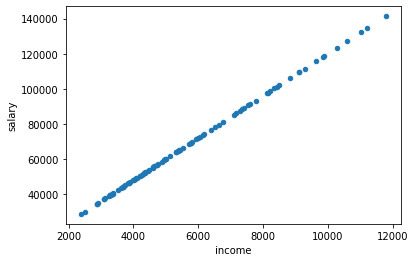

In [281]:
ax = total_credit.plot.scatter(x="income", y="salary", )

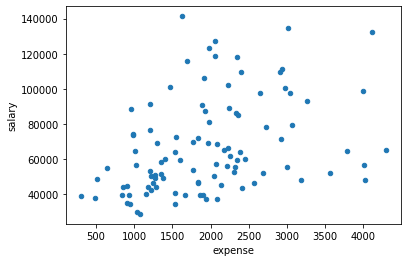

In [282]:
ax = total_credit.plot.scatter(x="expense", y="salary", )

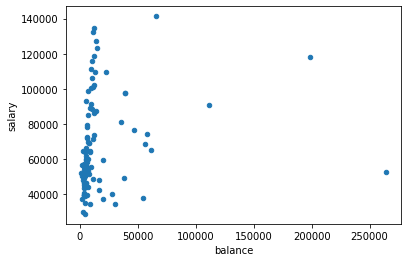

In [193]:
ax = total_credit.plot.scatter(x="balance", y="salary", )

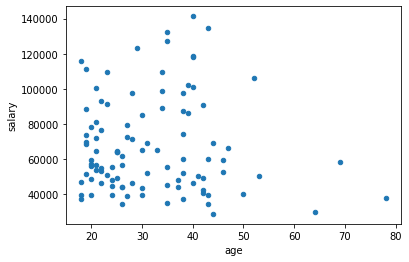

In [194]:
ax = total_credit.plot.scatter(x="age", y="salary", )

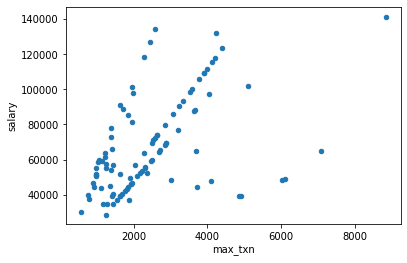

In [284]:
ax = total_credit.plot.scatter(x="max_txn", y="salary", )

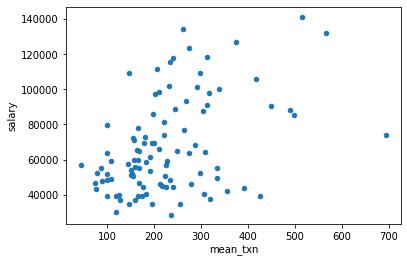

In [285]:
ax = total_credit.plot.scatter(x="mean_txn", y="salary", )

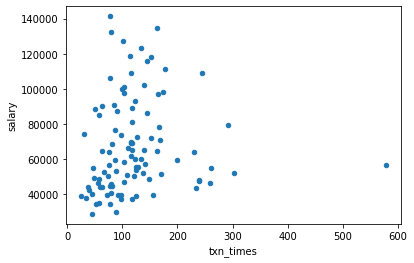

In [305]:
ax = total_credit.plot.scatter(x="txn_times", y="salary", )

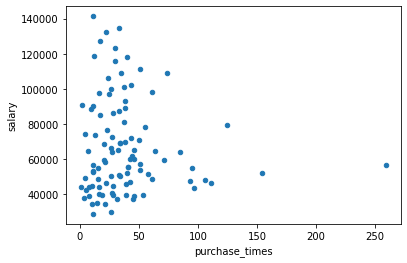

In [326]:
ax = total_credit.plot.scatter(x="purchase_times", y="salary", )

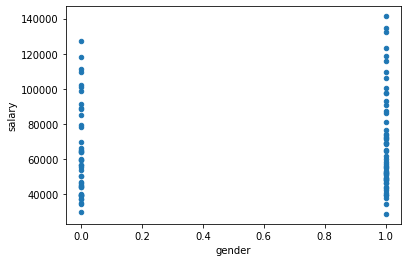

In [195]:
ax = total_credit.plot.scatter(x="gender", y="salary", )

In [327]:
if hasattr(total_credit, 'income'):
    total_credit.drop(columns = ['income','gender'], axis = 1, inplace=True)
total_credit

,customer_id,expense,balance,max_txn,mean_txn,txn_times,purchase_times,age,salary
0,CUS-1005756958,1217.620000,2275.852055,970.47,222.862603,73,26,53,50464.44
1,CUS-1117979751,2977.940000,9829.929000,3578.65,339.843700,100,26,21,100202.20
2,CUS-1140341822,1837.180000,5699.212250,1916.51,212.632500,80,39,28,45996.24
3,CUS-1147642491,2244.250000,9032.841186,1711.39,245.600169,118,38,34,88992.28
4,CUS-1196156254,2908.203333,22272.433755,3903.73,147.145796,245,74,34,109304.44
...,...,...,...,...,...,...,...,...,...
95,CUS-72755508,911.510000,4497.557069,1180.00,197.213276,58,14,35,34815.36
96,CUS-809013380,1776.060000,3756.902903,1383.00,151.694274,124,51,21,53927.64
97,CUS-860700529,2416.053333,3462.276009,1808.62,77.681888,233,97,30,43406.88
98,CUS-880898248,952.856667,8528.830385,1433.98,146.954487,78,21,26,34415.52


,expense,balance,max_txn,mean_txn,txn_times,purchase_times,age,salary
expense,1.000000,0.011052,0.312248,-0.213881,0.653522,0.589905,-0.086176,0.373477
balance,0.011052,1.000000,0.158644,0.272791,-0.134970,-0.172874,0.231963,0.186986
max_txn,0.312248,0.158644,1.000000,0.271480,0.046269,0.001510,-0.122263,0.497298
mean_txn,-0.213881,0.272791,0.271480,1.000000,-0.590261,-0.582894,0.175525,0.441326
txn_times,0.653522,-0.134970,0.046269,-0.590261,1.000000,0.956976,-0.168069,0.099279
purchase_times,0.589905,-0.172874,0.001510,-0.582894,0.956976,1.000000,-0.157512,-0.063520
age,-0.086176,0.231963,-0.122263,0.175525,-0.168069,-0.157512,1.000000,-0.036504
salary,0.373477,0.186986,0.497298,0.441326,0.099279,-0.063520,-0.036504,1.000000


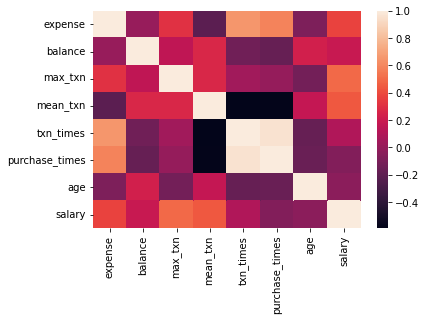

In [328]:
corr = total_credit.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [329]:
X = total_credit.iloc[:, 1:-1].values    # Features => age, <gender>, balance, expense and income => Independent Variable
y = total_credit.iloc[:, -1].values     # Target => salary => Dependent Variable

X

array([[1.21762000e+03, 2.27585205e+03, 9.70470000e+02, 2.22862603e+02,
        7.30000000e+01, 2.60000000e+01, 5.30000000e+01],
       [2.97794000e+03, 9.82992900e+03, 3.57865000e+03, 3.39843700e+02,
        1.00000000e+02, 2.60000000e+01, 2.10000000e+01],
       [1.83718000e+03, 5.69921225e+03, 1.91651000e+03, 2.12632500e+02,
        8.00000000e+01, 3.90000000e+01, 2.80000000e+01],
       [2.24425000e+03, 9.03284119e+03, 1.71139000e+03, 2.45600169e+02,
        1.18000000e+02, 3.80000000e+01, 3.40000000e+01],
       [2.90820333e+03, 2.22724338e+04, 3.90373000e+03, 1.47145796e+02,
        2.45000000e+02, 7.40000000e+01, 3.40000000e+01],
       [1.53986333e+03, 8.47579600e+03, 2.28236000e+03, 2.74614800e+02,
        7.50000000e+01, 2.70000000e+01, 2.50000000e+01],
       [1.07652667e+03, 4.92385364e+03, 1.25100000e+03, 2.36035000e+02,
        4.40000000e+01, 1.10000000e+01, 4.40000000e+01],
       [4.28856000e+03, 5.00394051e+03, 7.08109000e+03, 2.48545128e+02,
        1.17000000e+02, 3

In [350]:
y

array([ 50464.44, 100202.2 ,  45996.24,  88992.28, 109304.44,  63906.08,
        28623.84,  64856.4 ,  59217.08,  56663.04, 106001.84,  58414.72,
        39426.24, 109310.6 ,  87588.24,  59290.8 ,  60000.  ,  68513.76,
        46388.68,  93205.56,  78147.44,  37556.16,  61538.96,  29952.  ,
        63717.16,  38908.96,  85991.92, 141375.68,  39589.16,  69296.16,
        55408.08,  69590.36, 118578.72,  81130.4 ,  69276.48,  48431.2 ,
        52110.76, 127048.48,  48857.84,  36986.88,  53249.52,  73913.28,
        50436.24,  52319.04, 102070.2 ,  39379.92,  56765.52,  91082.88,
       101221.64,  39128.64, 123348.4 ,  44194.08,  44873.4 ,  97314.48,
        55687.2 ,  47707.4 , 132327.52,  90475.28,  40235.44,  79524.2 ,
        65244.24,  51804.48, 134576.52,  49218.96,  88246.56,  72603.96,
        44004.  ,  97809.4 ,  64585.64,  34550.36,  55068.16,  44235.36,
        57184.4 , 115702.44,  55111.68,  42187.44,  46295.28,  76680.24,
        36904.32,  66168.44,  40357.92,  64508.4 , 

In [351]:
# divide the dataset in some amount of training and testing data
# random_state => seed value used by random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [352]:
def result_acc(predictions):
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predictions), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, predictions), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, predictions), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, predictions), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, predictions), 2))

In [353]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [354]:
predictions = model.predict(X_test)
predictions

array([ 97050.73730982,  46021.32967933,  33454.2332257 ,  75897.36084844,
        60961.05550482,  83940.39504618,  44075.01015734,  99772.78850346,
        62038.08073626,  36933.29626297, 127801.8590156 ,  71735.64787008,
        48929.39909753,  86967.68916319, 117653.62897356,  60351.17238267,
        47831.39907546,  60656.29462549,  64755.89227103,  58976.99735339,
        86332.88566748, 114031.38465226,  65678.54628004,  48984.54239665,
        40172.79136339,  56040.83450561,  37688.48043231, 101308.60035817,
        83557.24871652,  41530.69093046])

In [355]:
result_acc(predictions)

Mean absolute error = 14626.27
Mean squared error = 380331203.95
Median absolute error = 12249.64
Explain variance score = 0.47
R2 score = 0.47


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


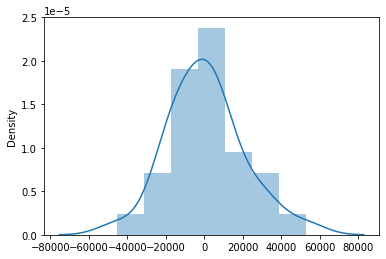

In [356]:
sns.distplot(predictions-y_test)

In [357]:
class Regressor():
    # init methodd initializes all parameters needed to implement regression
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    # random initialization of weights and bias
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    # compute the error function: sum of squared errors 
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    # implement optimization function (gradient descent)
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    # normalize the dataset by subtracting the mean and dividing by std deviation
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)
    # fit the model to the dataset: training process
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    # test the model on test data
    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    # plot the iterations vs cost curves
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    # calculates the accuracy
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

In [358]:
regressor = Regressor(normalize=True)
regressor.fit(X_train,y_train)

In [359]:
train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)
print("Train Score:", train_score)
print("Test Score: ",test_score)

Train Score: 0.7727678351155816
Test Score:  0.4714839654653846


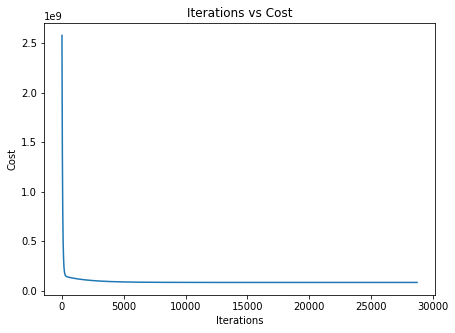

In [360]:
regressor.plot()

In [361]:
predictions = regressor.predict(X_test)
predictions

array([ 97036.65643369,  46017.34625506,  33468.1579536 ,  75895.22021314,
        60963.96627367,  83946.95488435,  44078.0071446 ,  99758.24546752,
        62038.18746555,  36936.28997209, 127781.84672031,  71728.21453378,
        48933.77627054,  86967.44321156, 117654.61719838,  60352.77231816,
        47838.12272958,  60651.40733343,  64757.54318533,  58973.73517233,
        86344.71561377, 114015.2557961 ,  65679.6230189 ,  48988.19649538,
        40174.99847937,  56044.20974489,  37694.03467408, 101299.64732266,
        83551.20920966,  41540.36409041])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


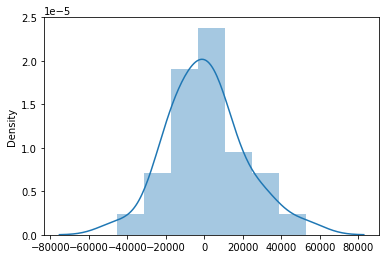

In [362]:
sns.distplot(predictions-y_test)

In [363]:
result_acc(predictions)

Mean absolute error = 14626.51
Mean squared error = 380322617.74
Median absolute error = 12248.81
Explain variance score = 0.47
R2 score = 0.47


In [364]:
dtree = tree.DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [365]:
predictions = dtree.predict(X_test)
predictions

array([ 76680.24,  39426.24,  49218.96,  52110.76,  44004.  ,  49218.96,
        69296.16, 109304.44,  63906.08,  44873.4 , 109304.44,  69590.36,
        53927.64, 123348.4 ,  64585.64,  63906.08,  59810.24,  57184.4 ,
        58414.72,  57184.4 ,  34550.36,  65244.24,  58414.72,  49218.96,
        56663.04,  58414.72,  40235.44, 109304.44,  65244.24,  56663.04])

In [366]:
result_acc(predictions)

Mean absolute error = 13353.79
Mean squared error = 387299841.92
Median absolute error = 9303.92
Explain variance score = 0.49
R2 score = 0.46


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


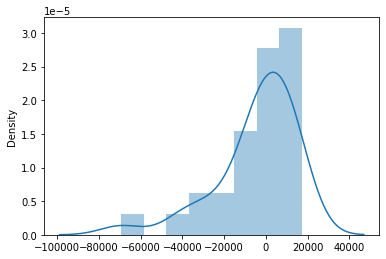

In [367]:
sns.distplot(predictions-y_test)

# **Conclusion**



1.   Through training the linear regression model, we found that the more relevant continous features (i.e., features of customers' consumption habits) we had extracted from the original data, the more accurate the model is. 
2.   We utilise mean absolute error (MAE), mean squared error (MSE), explain variance score (EVS) and R2 score to demonstrate the accuracy of the developed models. Our developed model has a good performance.
3.   To optimise the linear regression model, we added gradient decsent into the model, but the improvement of the performance is not significant.
4.   If the private information is well protected, I think segmenting customers into income brackets for reporting purposes is a good idea. This will enable us to figure out services towards corresponding salary segments. 
5.   The decision tree model performed less well than the linear regression. 

